# Aula 05 - K-means

## Algoritmo 

1. Especifique o número _k_ de clusters

2. Inicialize os _k_ centróides

3. **repita**: 
    - expectativa: atribua cada ponta ao centróide mais próximo
    - maximização: compute o novo centroid (ex: média) de cada cluster
4. **até**: as posições dos centróides não mudar 

## Função da distância

In [13]:
def distancia_euclidiana(A, B):
    import math
    
    if len(A) != len(B):
        print("Vetores de tamanho diferente")
        return None
    
    soma = 0
    for i in range(len(A)):
        soma += (A[i]-B[i])**2   # soma = soma + (A[i]-B[i])**2
    return math.sqrt(soma)

## Exemplo de k-means

Pontos aleatórios no espaço 2 dimensões.

In [14]:
from matplotlib import pyplot as plt 
import random
random.seed(42)

In [15]:
n_points = 1000                                # Total de pontos
x = [random.random() for i in range(n_points)] # Variável X, com valores aleatórios entre 0 e 1
y = [random.random() for i in range(n_points)] # Variável Y, com valores aleatórios entre 0 e 1
pontos = list(zip(x, y))                       # 'pontos' é uma lista de pares (x,y), ou seja, de tuplas!

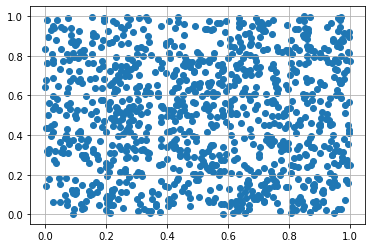

In [16]:
# Observando os pontos no espaço bidimensional 
plt.scatter(x, y)
plt.grid()
plt.show()

### Função para plotar dados

Plota os clusteres e seus centroids conforme forem atualizados. Os pontos são plotados utilizando seu cluster como indicação de tipos distintos (portanto, cores diferentes), e os centróides são pequenos diamantes vermelhos. 

Se os `grupos` ainda **não** estão definidos (None) então plote todos ignorando classes (ou seja, o parâmetro `c` de cores fica o valor default). 

Se os `grupos` estão definidos, use os IDs das classes como seletor de cores distintas. 

In [17]:
def plotar_cluster(grupos, centroids):
    
    if grupos: 
        plt.scatter(x, y, c=list(grupos.values()))
    else:
        plt.scatter(x, y)

    cx, cy = zip(*centroids)
    plt.scatter(cx, cy, color="red", marker="D")
    plt.grid()
    plt.show()

### Função de inicialização dos clusters

Inicializa os **K** clusters escolhendo K centróides aleatórios dentre os pontos originais do problema. Retorna os centróides escolhidos para quem chamou a função. 

In [18]:
def inicializa_clusters(lista, k):
    import random as rd
    n = len(lista)
    centroides = []
    for i in range(k): 
        centroides.append(lista[rd.randint(0,n-1)])
    return centroides

### Função de atribuição dos pontos aos clusteres

Dados: 
- `lista`: a lista de pontos
- `centroides`: a lista de centroides correntes

Faça: 
- Calcule a distância de cada ponto a cada um dos centróides
- Descubra o centróide mais próximo do ponto em questão
- Veja o ID do cluster do centróide mais próximo
- Atribua este ID a este ponto (ou seja, "mova" este ponto para este cluster)

Retorne:
- Um dicionário que dado um ponto (uma _tupla_ `(x, y)`), informe a qual cluster ele pertence

In [19]:
def atribui_pontos(lista, centroides): 
    
    # Para cada ponto
    grupos = {}
    for ponto in lista: 
        
        # Calcule a distancia dele até cada centróide
        distancias = {}
        for i in range(len(centroides)):
            distancias[i] = distancia_euclidiana(ponto, centroides[i])
            
        # Pegue o centroide mais próximo 
        centro_mais_proximo = sorted(distancias, key=distancias.get)[0]
        
        # Associe este ponto a este centroide
        grupos[ponto] = centro_mais_proximo
        
    return grupos

### Função de atualização dos centróides

Toda vez que mexemos na distribuição dos clusteres, ou seja, adicionamos ou removemos pontos a este subconjunto, nós impactamos a distribuição total daquele cluster, portanto, nosso centróide deve ser reposicionado. 

Reposicionar o `centróide` é movê-lo para a nova posição que representa "o valor médio" daquele cluster. 

Importante retornar a lista de centróides atualizada!

In [20]:
def atualizar_centroides(grupos, centroides):  
    
    clusters = {}
    novos_centroides = []
    
    # Faça uma lista de pontos associados a cada centroide
    for ponto, cluster in grupos.items():
        if cluster in clusters.keys():
            aux = clusters[cluster]
            aux.append(ponto)
            clusters[cluster] = aux
        else:
            clusters[cluster] = [ponto]
               
    # Para cada centroide atual, atualize sua posição baseado na media
    # dos pontos associados a este cluster 
    for i in range(len(centroides)):     
        x, y = zip(*clusters[i])
        novos_centroides.append( (sum(x)/len(x), sum(y)/len(y)) )
    
    # Retorne a lista de novos centroides
    return novos_centroides

### Função _K_-means

Função principal do algoritmo, seguindo o pseudocódigo do início do notebook e também construído em conjunto na sala de aula! 

Retornos: 
- `novos_centroides`: os últimos ótimos, a partir desses não houveram novos posicionamentos (ou os últimos centróides calculados, caso a algoritmo atinjiu o máximo de iterações permitidas)
- `grupos`: um dicionário que dado um ponto (uma tupla (x, y)), informe a qual cluster ele pertence ao final da execução
- `itr`: quantidade de iterações necessárias para convergir o algorítmo 

In [21]:
def kmeans(lista, k, max_iter=500):
    
    itr = 1
    centroides = []
    
    novos_centroides = inicializa_clusters(lista, k)
    
    plotar_cluster(None, novos_centroides)
    
    while ((itr <= max_iter) and
          (novos_centroides != centroides)):
        centroides = novos_centroides
        grupos = atribui_pontos(lista, centroides)
        novos_centroides = atualizar_centroides(grupos, centroides)
        itr += 1
        
        plotar_cluster(grupos, novos_centroides)
        
    return novos_centroides, grupos, itr

### Uso do _K_-means

Aproveite para explorar as saídas! Varie a quantidade de pontos, o valor de K, e o máximo de interações. 

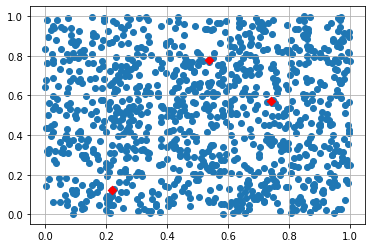

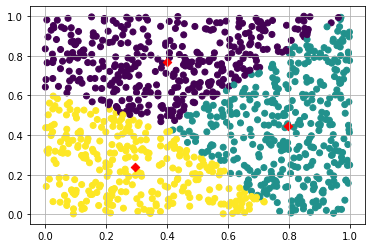

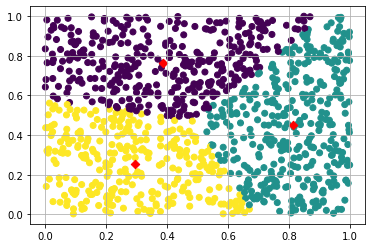

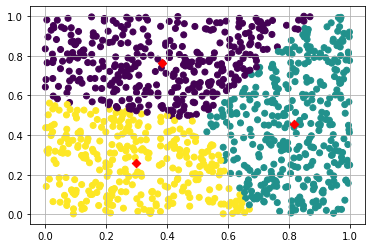

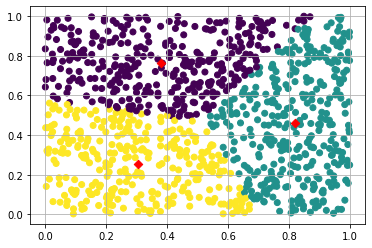

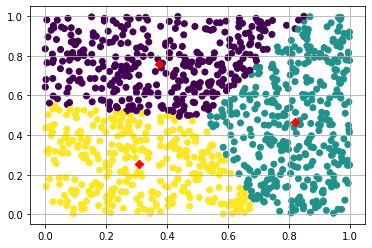

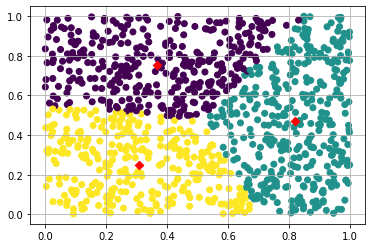

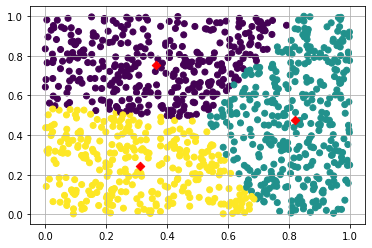

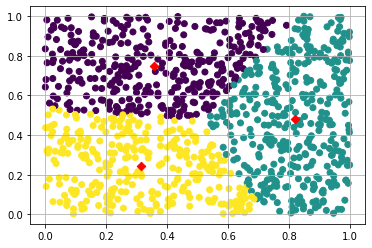

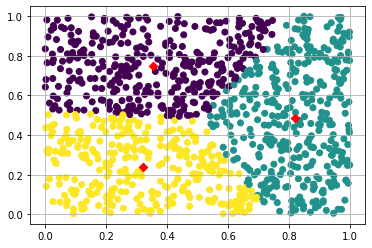

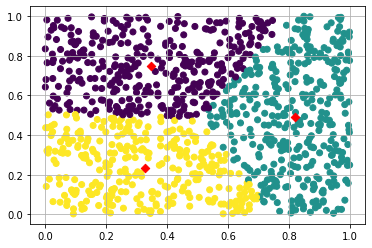

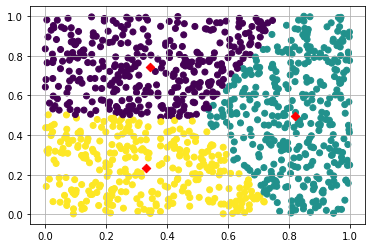

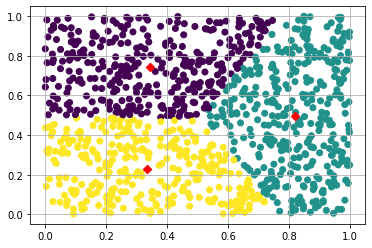

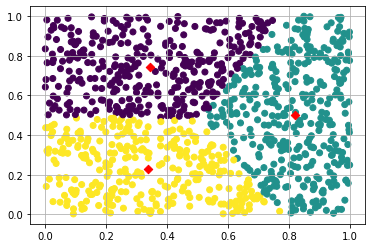

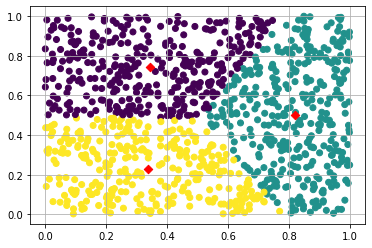

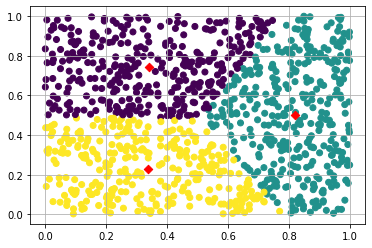

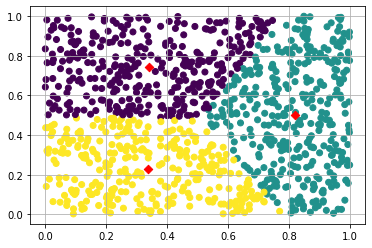

In [22]:
c, grupos, n_itr = kmeans(pontos, 3, 100)

In [23]:
# Os últimos centroides calculados 
c

[(0.34199941232239317, 0.7442949415154703),
 (0.8203837858725992, 0.5024099885193848),
 (0.338176580558427, 0.22964487440703368)]

In [24]:
# O número de iterações necessários para convergir o algoritmo
n_itr

17